# Introduction to Modern Mathematical Modeling
# Chapter 8; Stochastic Models

### Weierstrass' Function
$$y(t) = \sum_{n=0}^\infty a^n \cos(b^n\pi t)$$
where $0 < a < 1,\ ab > 1+3\pi/2 \approx 5.71$

In [39]:
import numpy as np
import numpy.random as rando
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [40]:
styledict = {'xtick.labelsize':25,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':25,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [41]:
a = 0.5
b = 13
m = 1_000
n = 100

t = np.linspace(-2, 2, m)

weier = np.zeros(t.size)
for i in range(n):
    weier += (a**i)*np.cos((b**i)*np.pi*t)

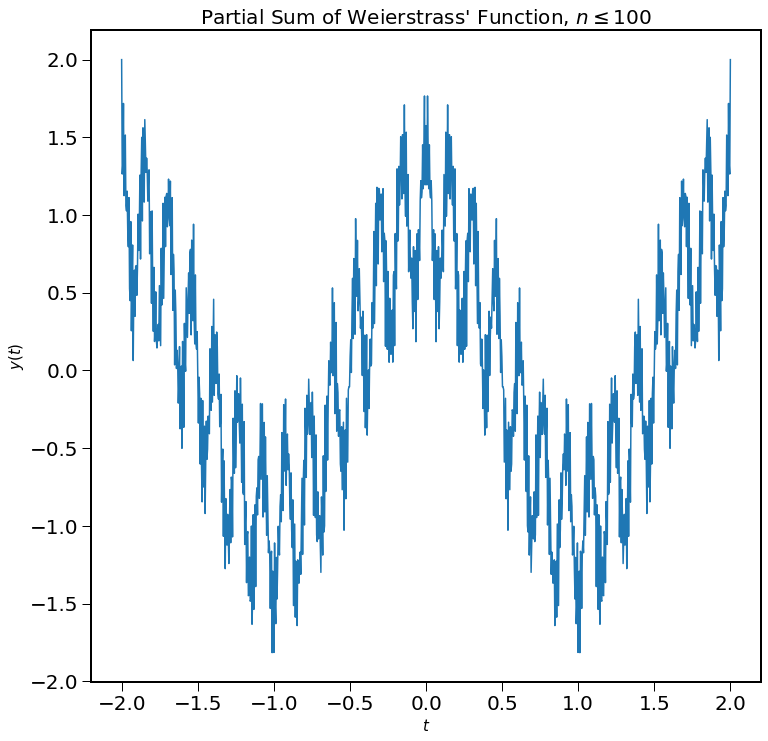

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
ax.plot(t, weier)
ax.set_ylabel("$y(t)$", size=15)
ax.set_xlabel("$t$", size=15)
ax.set_title("Partial Sum of Weierstrass' Function, $n \leq 100$", size=20);

plt.savefig("CH8;PartialSumofWeierstrassFunction.jpg")

In [43]:
dis = np.cumsum(rando.normal(size=(1_000,1)))
xdis = rando.normal(size=(50,1))
ydis = rando.normal(size=(50,1))

arrows = [patches.Arrow(xdis[i,0], ydis[i,0], xdis[i+1,0], ydis[i+1,0], width=.01)
          for i in range(xdis.shape[0]-1)]

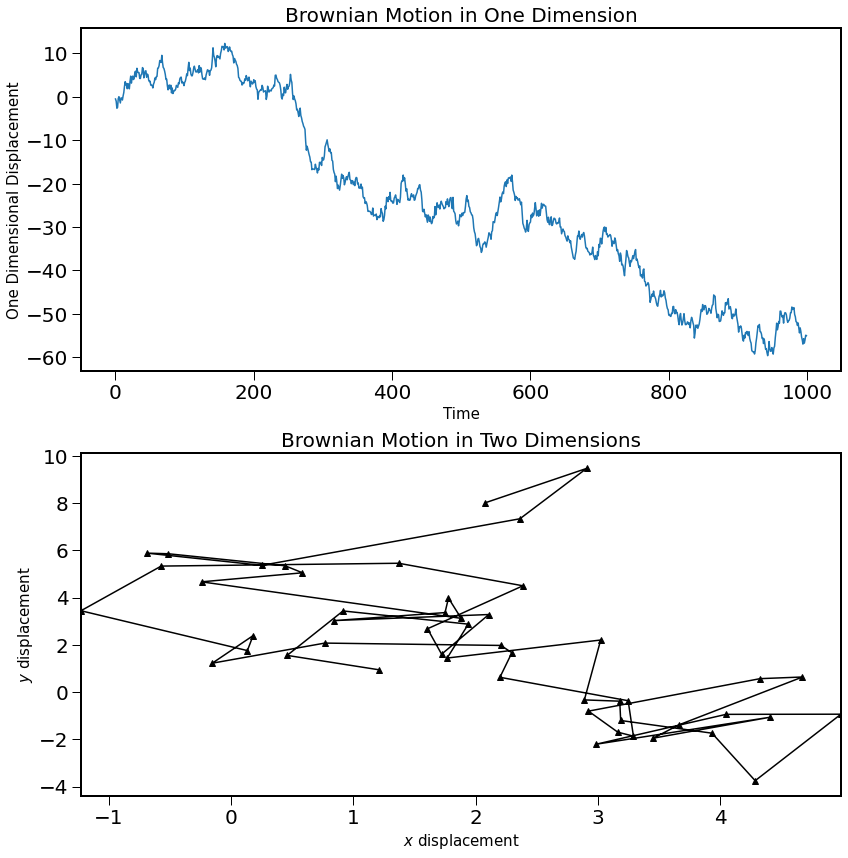

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))

ax[0].plot(dis)
ax[0].set_ylabel("One Dimensional Displacement", size=15)
ax[0].set_xlabel("Time", size=15)
ax[0].set_title("Brownian Motion in One Dimension", size=20)

#for i in arrows:
#    ax[1].add_patch(i)
ax[1].plot(np.cumsum(xdis), np.cumsum(ydis), 'k-^')
ax[1].set_ylabel("$y$ displacement", size=15)
ax[1].set_xlabel("$x$ displacement", size=15)
ax[1].set_title("Brownian Motion in Two Dimensions", size=20)
ax[1].set_xlim(np.cumsum(xdis).min(), np.cumsum(xdis).max())

fig.tight_layout(pad=1)

plt.savefig("CH8;BrownianMotionDemo.jpg")

In [45]:
dis = rando.normal(size=(1_000,1))
at = rando.poisson(lam=1, size=(1_000,1))
select = np.where(at != 0)[0]
dis[select] = dis[select]*at[select]

cumulativeDis = np.cumsum(dis)

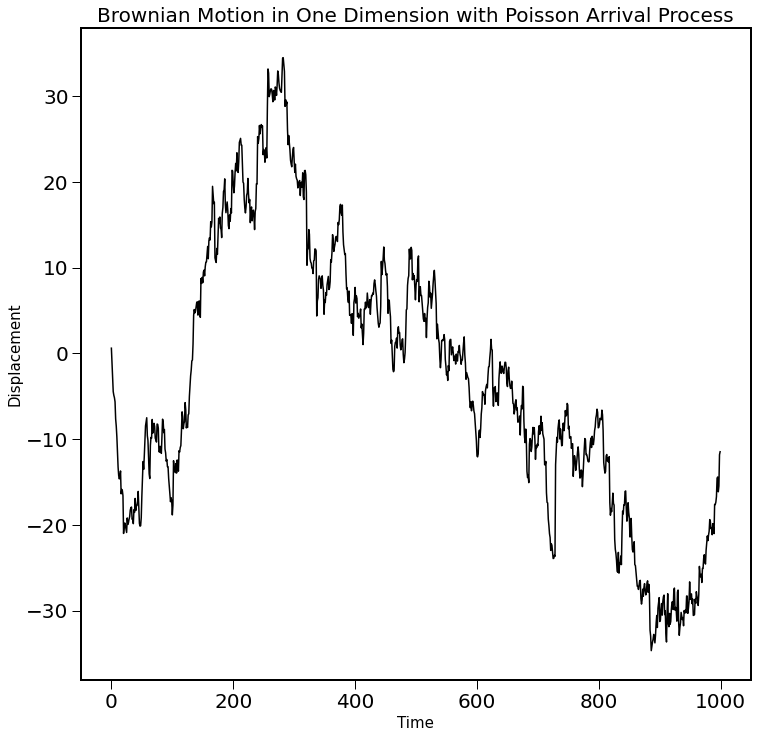

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

ax.plot(cumulativeDis, '-k')
ax.set_xlabel("Time", size=15)
ax.set_ylabel("Displacement", size=15)
ax.set_title("Brownian Motion in One Dimension with Poisson Arrival Process", size=20);

plt.savefig("CH8;1DBrownianMotionPoissonArrival.jpg")

In [47]:
xdis = rando.normal(size=(1_000,1))
ydis = rando.normal(size=(1_000,1))

at = rando.poisson(lam=1, size=(1_000,1))
select = np.where(at != 0)[0]

xdis[select] = xdis[select]*at[select]
ydis[select] = ydis[select]*at[select]

cumulativexDis = np.cumsum(xdis)
cumulativeyDis = np.cumsum(ydis)

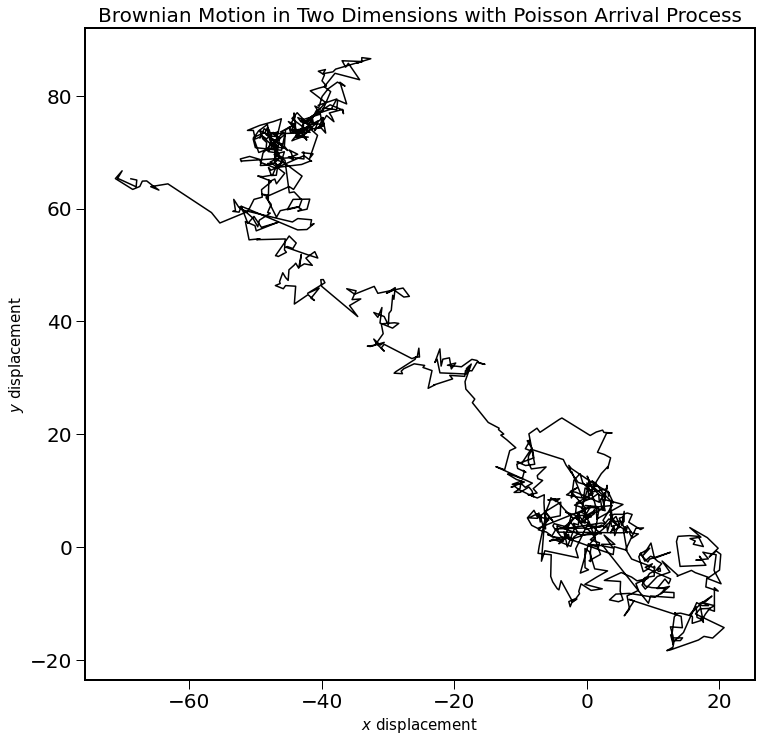

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

ax.plot(cumulativexDis, cumulativeyDis, '-k')
ax.set_xlabel("$x$ displacement", size=15)
ax.set_ylabel("$y$ displacement", size=15)
ax.set_title("Brownian Motion in Two Dimensions"
             " with Poisson Arrival Process", size=20);

plt.savefig("CH8;2DBrownianMotionPoissonArrival.jpg")

In [49]:
rando.seed(1203)
delt = 1e-3
w = np.zeros(np.int(1/delt))
rands = rando.normal(size=w.shape)
lin1 = np.cumsum(w+rands*np.sqrt(delt))

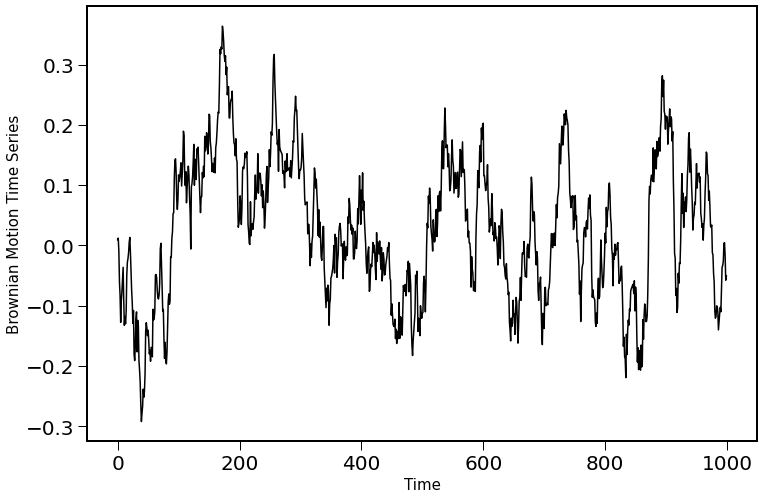

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.plot(lin1, '-k')
ax.set_xlabel("Time", size=15)
ax.set_ylabel("Brownian Motion Time Series", size=15);

plt.savefig("CH8;BrownianMotionTimeSeries.jpg")